# Lab1:
$$\Huge \text{Linear Regression }$$

## Introduction :
    In this Lab  you'll predict the price, labeled as Median value of owner-occupied homes, of houses in Boston using  a predefined dataSet. 
    
    Objective :
        - plot different aspect of Dataset features
        - Create different linear & Multiple Regression Models
        - Analyse Models
        - Create a House Price Prediction 
    

####  Statsmodels
- Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration

In [1]:
!pip install statsmodels

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import statsmodels.api as sm

#### sklearn
- free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms

In [55]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [54]:
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [73]:
# numpy adds support for large, multi-dimensional arrays and matrices,
import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# A DataFrame for the Target
target = pd.DataFrame(data.target, columns=["MEDV"])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [82]:
# get a glimse of the dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [83]:
# Disaplay main dataframe features stats
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [86]:
# the target is a dataframe too adn it's related to the Median House Price. MEDV
target.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


#### Seaborn 
- Seabornis a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [48]:
!pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [49]:
# load the plotting library 
import seaborn as sns

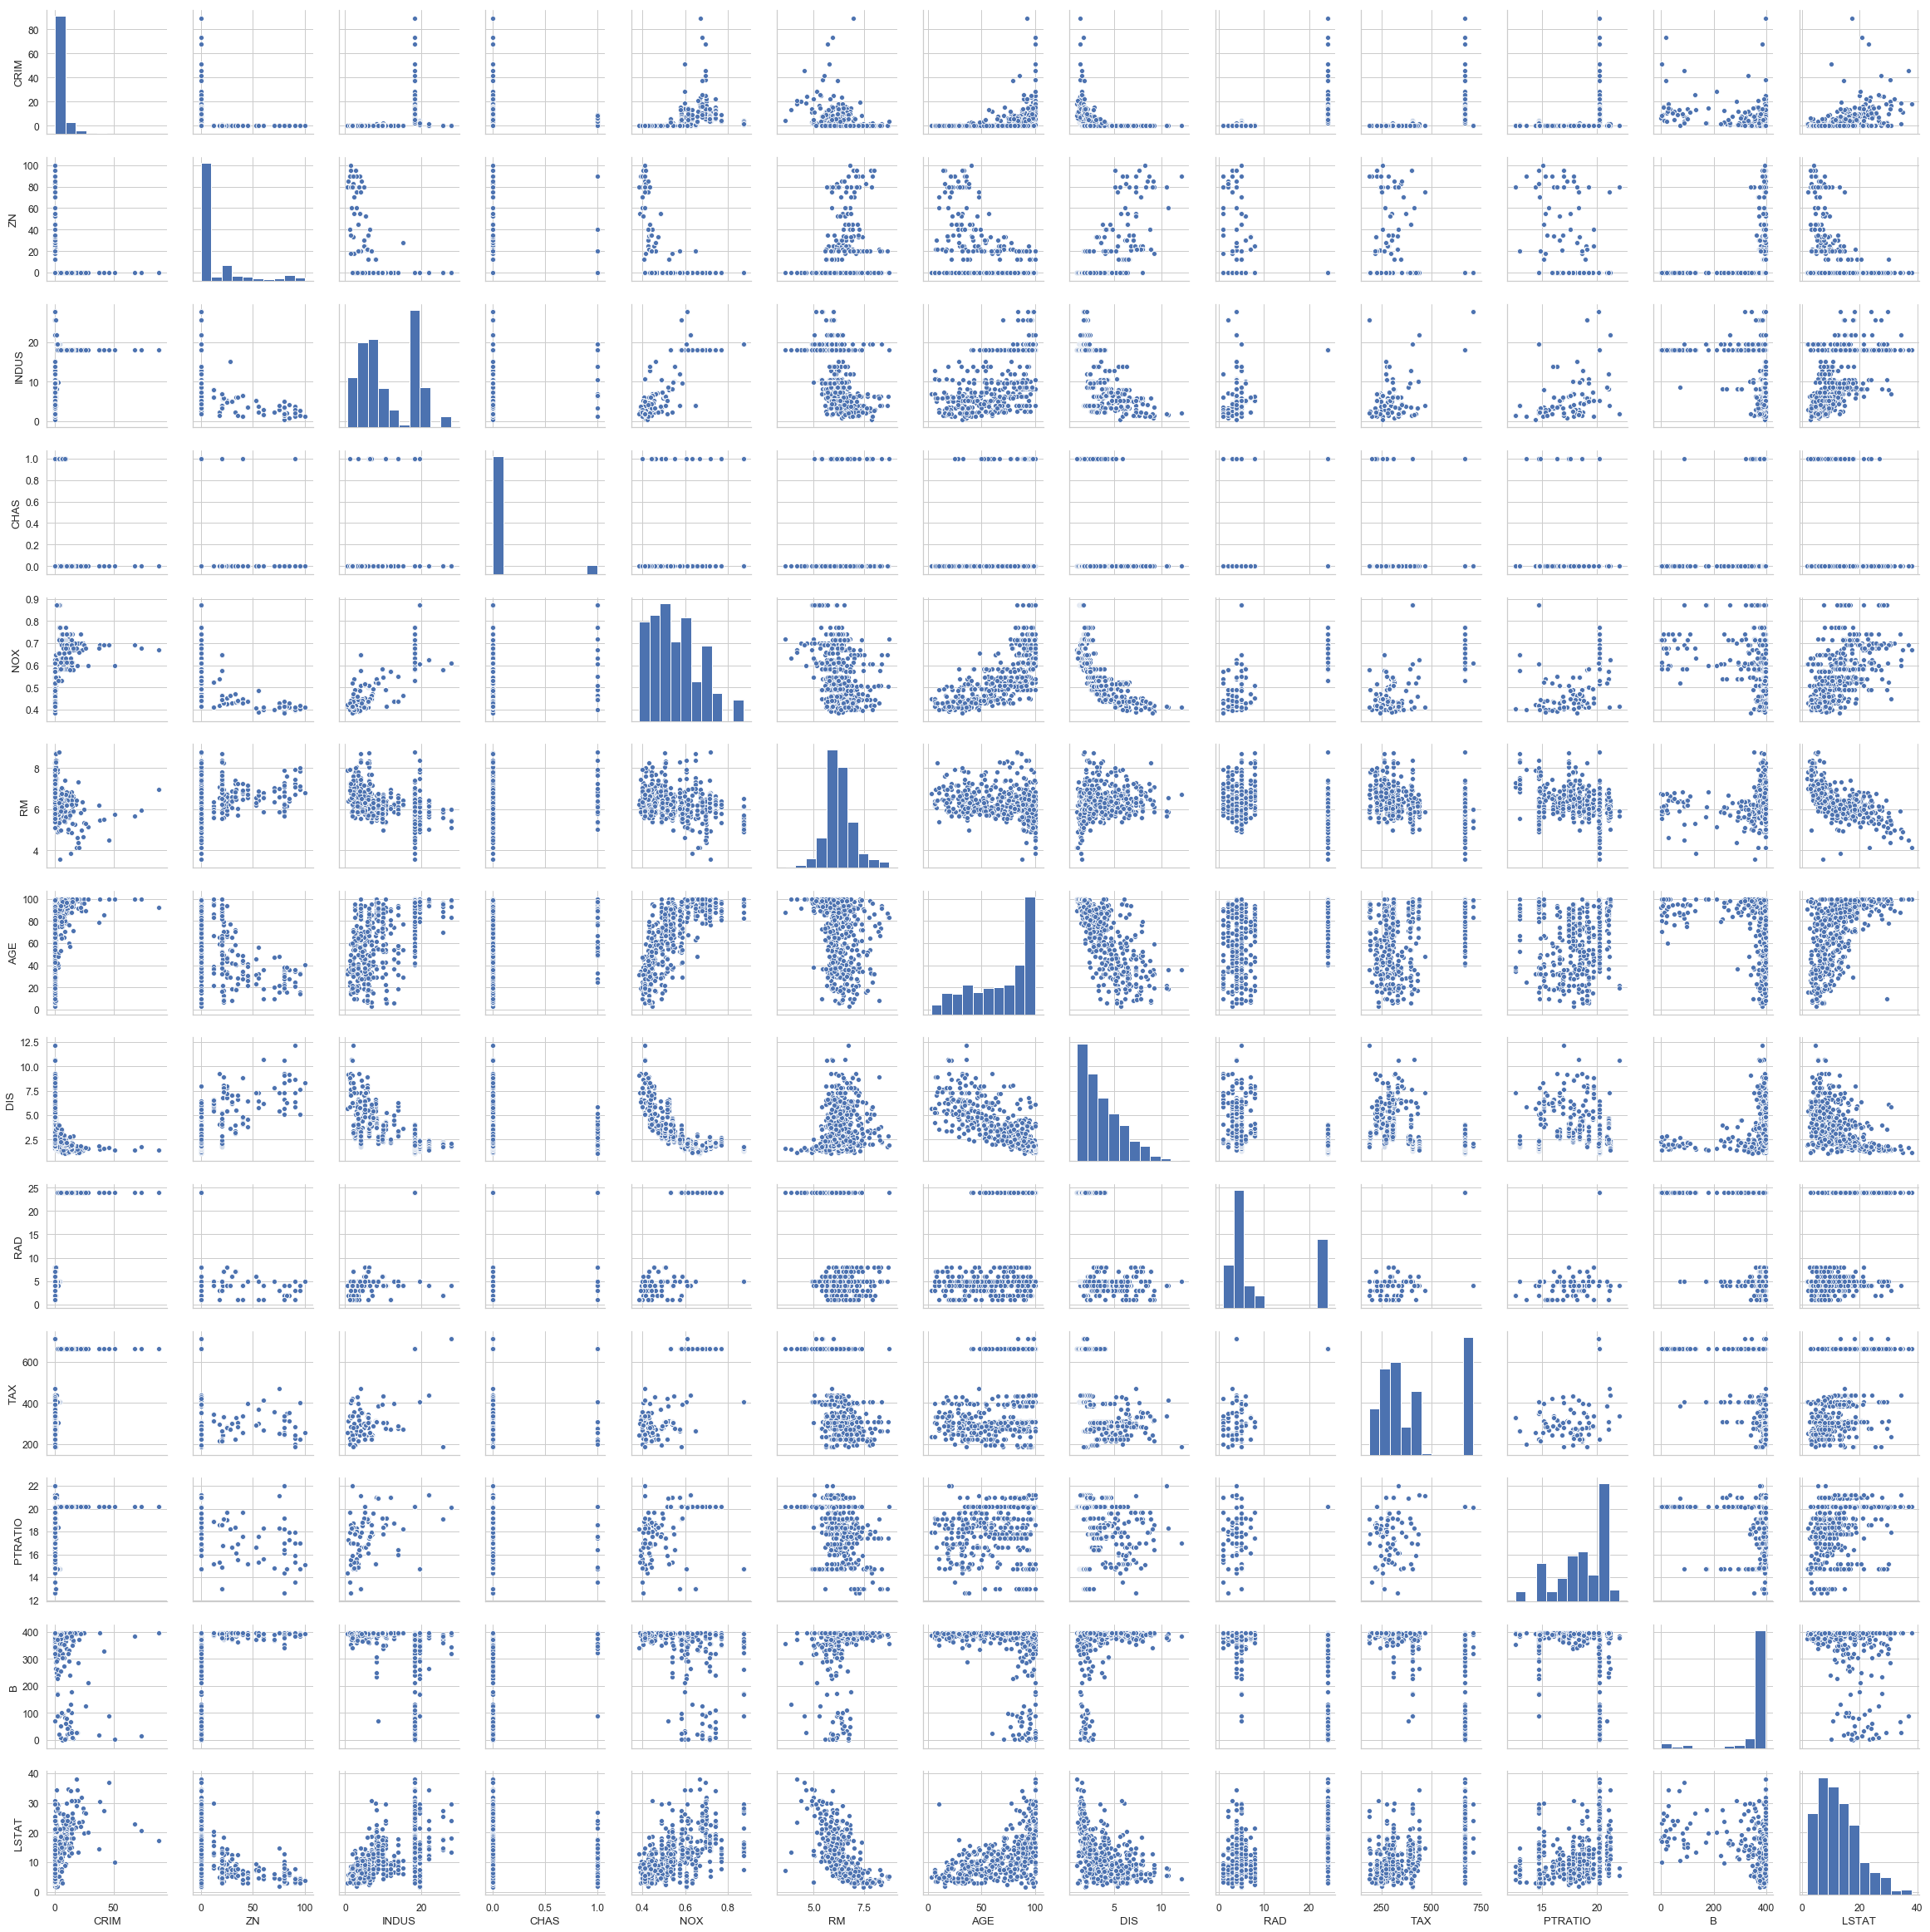

In [89]:
# plot all Dataframe variables in a plotting matrix 
sns.pairplot(df)

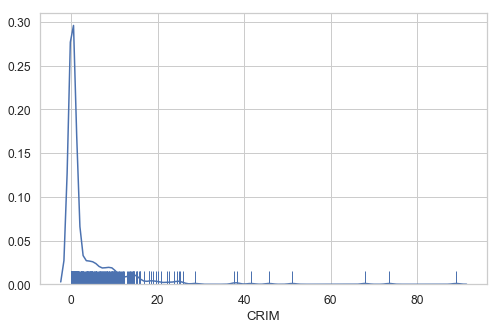

In [95]:
# combine histogram and simple graph plotting for the dataframe crime rate features . 
sns.distplot(df['CRIM'], rug=True)

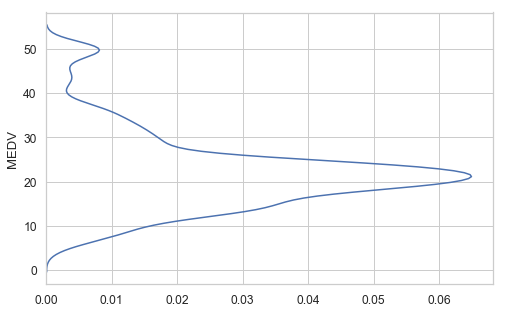

In [102]:
# MEDV. plot 
sns.distplot(target['MEDV'], vertical=True, hist=False)

- Modelisation of a linear regression depicting  RM and MEDV
 $$\large  y=f(x)$$
 Wiht  $\text{ x=RM and Y=MEDV}$ 

In [119]:
## Linear Regression without Y intercept

import statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

# Note the difference in argument order
model1 = sm.OLS(y, X).fit()
predictions = model1.predict(X) # make the predictions by the model

# Print out the statistics
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):          3.74e-256
Time:                        23:32:31   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

![](model1.png)

### $R^2$
- R-squared ($R^2$) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 

### P-value
- p-value or probability value is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct

In [120]:
target["predicted"]=predictions
target.head()

,MEDV,predicted
0,24.0,24.020779
1,21.6,23.458163
2,34.7,26.249323
3,33.4,25.566146
4,36.2,26.110495


### Evaluation :
$$ \color{red} {\text{ write the linear equation of the model1   above}}$$

$$\huge y= mx+c$$

In [105]:
# Add  constnt to the previous linear Model  


X = df["RM"] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model2 = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model2.predict(X)

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           2.49e-74
Time:                        22:51:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

![](model3.png)

$$ \color{red} {\text{ write the linear equation of the model2   above}}$$

$$\huge y= mx+c$$

# Lab1:
$$\Huge \text{Multiple Linear Regression }$$

### Part I

In [26]:
X = df[["RM", "LSTAT"]]
y = target["MEDV"]
model3 = sm.OLS(y, X).fit()
predictions = model3.predict(X)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:48:01   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluation 
- Notice the $R^2$ amelioration :  
What is it's value in the model above?: $_____________$ 
$$ \color{red} {\text{ write the linear equation of the model3   above}}$$

$$\huge y= mx+c$$

### Part II

## Multiple Linear Regression in SKLearn

In [27]:
from sklearn import linear_model

In [107]:
# set the undependant and the dependant variable 
X = df
Y = target["MEDV"]

In [108]:
# creta a model depicting the MDEV in function of all the Dataframe parameters.
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
# generate Price MEDV predition of first 5 records, 
predictions = lm.predict(X)
print(predictions[0:5])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


In [117]:
target["predicted"]=predictions
target.head()


,MEDV,predicted
0,24.0,30.003843
1,21.6,25.025562
2,34.7,30.567597
3,33.4,28.607036
4,36.2,27.943524


In [36]:
# R² score 
lm.score(X,y)

0.7406426641094095

In [38]:
lm.intercept_

36.459488385089855